In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

# visualizaion

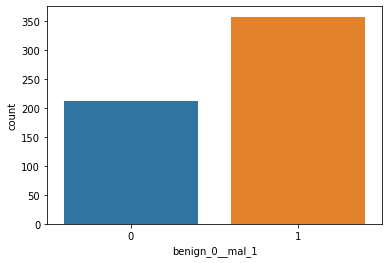

In [10]:
sns.countplot(x='benign_0__mal_1',data=df)

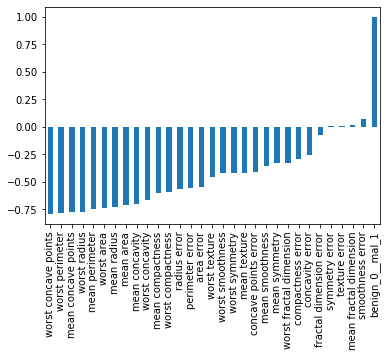

In [16]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

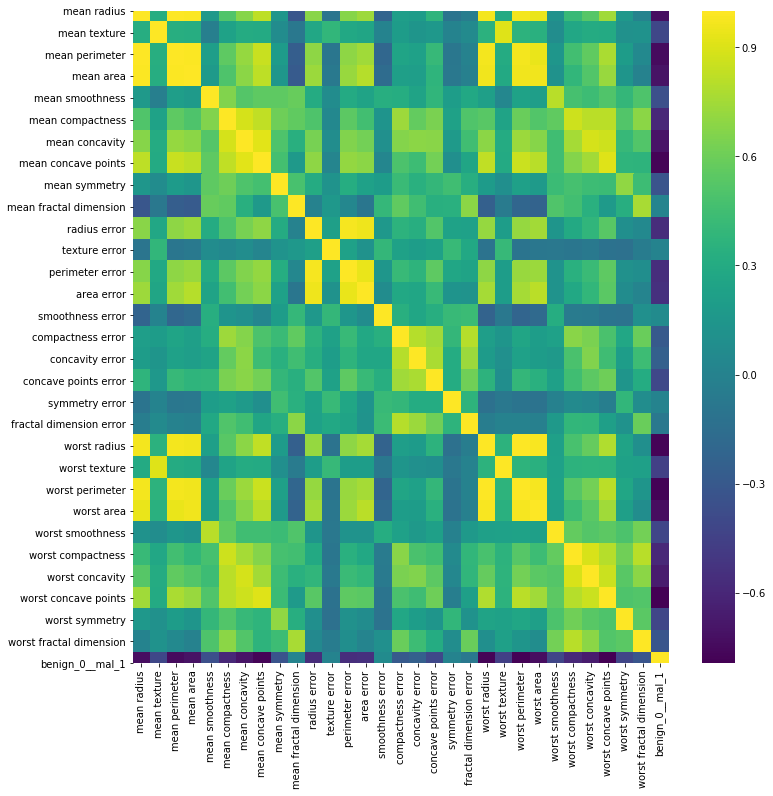

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='viridis')

# Data Sclaer

In [20]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.fit_transform(X_test)

# Model and Analysis

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [93]:
X_train.shape

(426, 30)

In [113]:
model = Sequential()

In [138]:
#dropout을 사용하면 무작위로 뉴런을 지우고 정해서 효율적으로 신경망을 학습시킬 수 있다.

In [114]:
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [ ]:
#EarlyStopping을 하게 되면 epochs이 아무리 커도 loss가 최소일때의 값을 찾을 수 있다.

In [115]:
from tensorflow.keras.callbacks import EarlyStopping

In [116]:
early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=25)

In [117]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 818us/sample - loss: 0.6862 - val_loss: 0.6641
Epoch 2/600
426/426 [==============================] - 0s 46us/sample - loss: 0.6738 - val_loss: 0.6475
Epoch 3/600
426/426 [==============================] - 0s 50us/sample - loss: 0.6440 - val_loss: 0.6310
Epoch 4/600
426/426 [==============================] - 0s 55us/sample - loss: 0.6504 - val_loss: 0.6085
Epoch 5/600
426/426 [==============================] - 0s 46us/sample - loss: 0.6211 - val_loss: 0.5833
Epoch 6/600
426/426 [==============================] - 0s 50us/sample - loss: 0.6057 - val_loss: 0.5553
Epoch 7/600
426/426 [==============================] - 0s 49us/sample - loss: 0.5854 - val_loss: 0.5281
Epoch 8/600
426/426 [==============================] - 0s 49us/sample - loss: 0.5696 - val_loss: 0.4980
Epoch 9/600
426/426 [==============================] - 0s 46us/sample - loss: 0.5341 - val_loss: 0.4664
Epoch 10/600
426/

426/426 [==============================] - 0s 49us/sample - loss: 0.1174 - val_loss: 0.1537
Epoch 79/600
426/426 [==============================] - 0s 48us/sample - loss: 0.1346 - val_loss: 0.1810
Epoch 80/600
426/426 [==============================] - 0s 45us/sample - loss: 0.1240 - val_loss: 0.1495
Epoch 81/600
426/426 [==============================] - 0s 47us/sample - loss: 0.1168 - val_loss: 0.1466
Epoch 82/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0930 - val_loss: 0.1526
Epoch 83/600
426/426 [==============================] - 0s 45us/sample - loss: 0.1051 - val_loss: 0.1697
Epoch 84/600
426/426 [==============================] - 0s 44us/sample - loss: 0.1132 - val_loss: 0.1840
Epoch 85/600
426/426 [==============================] - 0s 44us/sample - loss: 0.1174 - val_loss: 0.1629
Epoch 00085: early stopping


In [118]:
model_losses = pd.DataFrame(model.history.history)

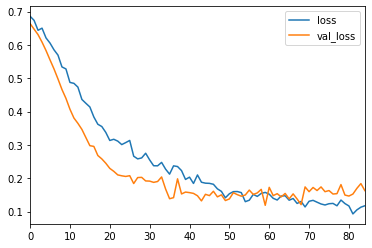

In [119]:
model_losses.plot()

In [121]:
predictions = model.predict_classes(X_test)

In [122]:
from sklearn.metrics import confusion_matrix,classification_report

In [123]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.99      0.90      0.94        88

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



In [135]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 9 79]]


In [136]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel() 

In [137]:
print('tn:',tn , 'fp:',fp, 'fn:',fn, 'tp:',tp)

tn: 54 fp: 1 fn: 9 tp: 79
